Project Name: **Data Science Job salaries**

Prepared On: **Feb 11, 2025**

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### About The Datasets Columns:

**work_year:** The year the salary was paid.

**experience_level:** The experience level of the employee (EN: Entry-level, MI: Mid-level, SE: Senior-level, EX: Executive-level).

**employment_type:** The type of employment (PT: Part-time, FT: Full-time, CT: Contract, FL: Freelance).

**job_title:** The role or job title of the employee during the year.

**salary:** The total gross salary amount paid.

**salary_currency:** The currency of the salary paid (ISO 4217 currency code).

**salary_in_usd:** The salary converted to USD using the average exchange rate for the year.

**employee_residence:** The employee's primary country of residence (ISO 3166 country code).

**remote_ratio:** The percentage of work done remotely (0: None, 50: Partial, 100: Fully remote).

**company_location:** The country of the employer's main office (ISO 3166 country code).

**company_size:** The size of the company (S: Small <50, M: Medium 50-250, L: Large >250 employees).

### Load the Datasets:

*   I have three different datasets df1, df2 and df3
*   df2 having one unneccessary columns, So firstly drop that
*   Then, Concat the three datasets



In [275]:
df1 = pd.read_csv('/content/Data Science Jobs Salaries.csv')
print(df1.shape)
df1.head()

(245, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [276]:
df2 = pd.read_csv('/content/ds_salaries.csv')
print(df2.shape)
df2.head()

(607, 12)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [277]:
df3 = pd.read_csv('/content/ds_salaries1.csv')
print(df3.shape)
df3.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Preprocessing

In [278]:
# Remove the Unnneccary columns
df2 = df2.drop(columns=['Unnamed: 0'], errors='ignore')

In [279]:
df = pd.concat([df1,df2,df3], ignore_index=True)
print(df.shape)
df.head()

(4607, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


### Inspect the Dataset

In [280]:
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4607 non-null   object
 1   experience_level    4607 non-null   object
 2   employment_type     4607 non-null   object
 3   job_title           4607 non-null   object
 4   salary              4607 non-null   int64 
 5   salary_currency     4607 non-null   object
 6   salary_in_usd       4607 non-null   int64 
 7   employee_residence  4607 non-null   object
 8   remote_ratio        4607 non-null   int64 
 9   company_location    4607 non-null   object
 10  company_size        4607 non-null   object
dtypes: int64(3), object(8)
memory usage: 396.0+ KB
None
             salary  salary_in_usd  remote_ratio
count  4.607000e+03    4607.000000   4607.000000
mean   2.248432e+05  132235.572824     50.738007
std    9.809749e+05   66392.255579     48.011910
min    4.000000e

In [281]:
# Convert categorical 'work_year' to numeric
if df['work_year'].dtype == 'object':
  df['work_year'] = pd.to_numeric(df['work_year'], errors='coerce')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           4428 non-null   float64
 1   experience_level    4607 non-null   object 
 2   employment_type     4607 non-null   object 
 3   job_title           4607 non-null   object 
 4   salary              4607 non-null   int64  
 5   salary_currency     4607 non-null   object 
 6   salary_in_usd       4607 non-null   int64  
 7   employee_residence  4607 non-null   object 
 8   remote_ratio        4607 non-null   int64  
 9   company_location    4607 non-null   object 
 10  company_size        4607 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 396.0+ KB


In [283]:
df.isnull().sum()

,0
work_year,179
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [284]:
df['work_year'] = df['work_year'].fillna(df['work_year'].mode()[0])

In [285]:
df.duplicated().sum()

1767

In [286]:
# Since we have duplicated values the we remove this
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [287]:
df.shape

(2840, 11)

### EDA

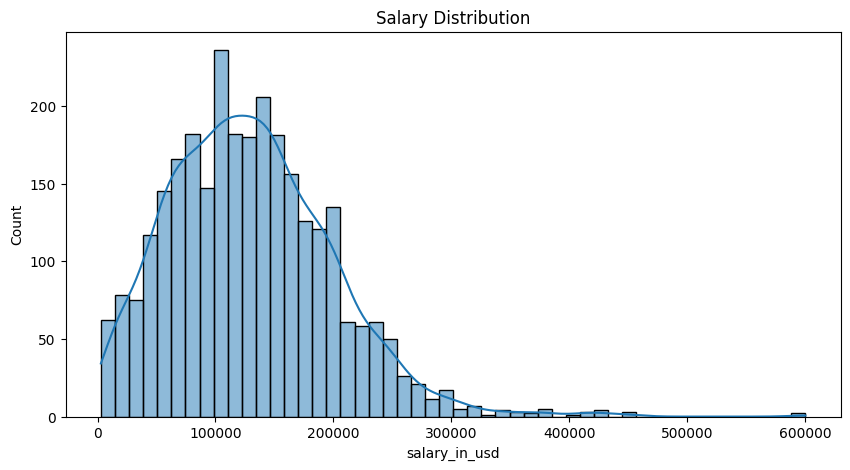

In [288]:
# Visualize salary distribution
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution')
plt.show()

Text(0.5, 1.0, 'Experience Vs Salary Distribution')

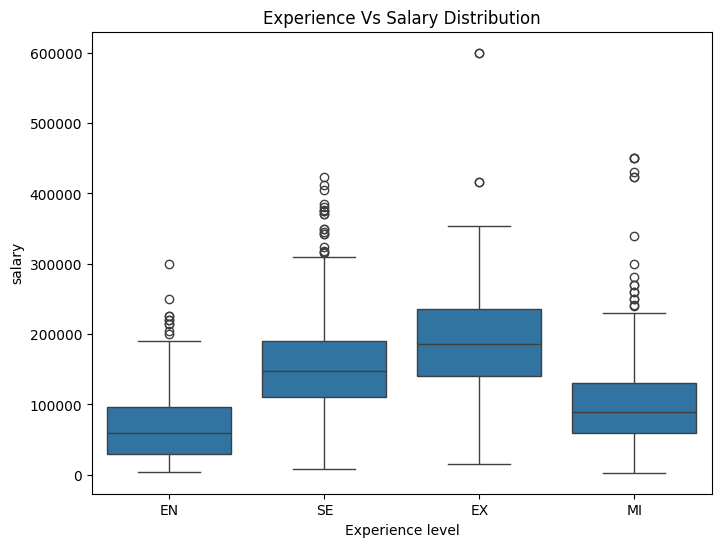

In [289]:
# Visualize salary by experience level
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience level')
plt.ylabel('salary')
plt.title('Experience Vs Salary Distribution')

In [290]:
# From the boxplot: Their is a big outlier value, so first we remove it because it is poorly effect our model performance
Q1 = df['salary_in_usd'].quantile(0.25)  # 25th percentile
Q3 = df['salary_in_usd'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR  # Anything above this is an outlier

df = df[df['salary_in_usd'] <= upper_bound]

Text(0.5, 1.0, 'Experience Vs Salary Distribution')

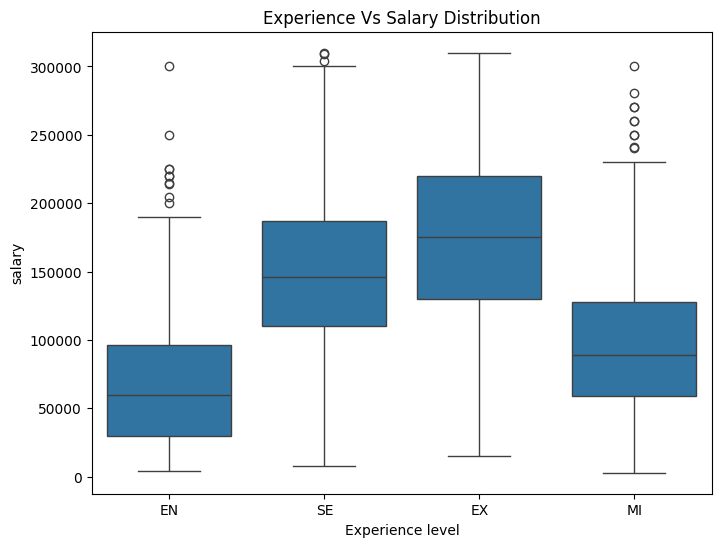

In [291]:
# let see it again

plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience level')
plt.ylabel('salary')
plt.title('Experience Vs Salary Distribution')

# Now it looking good 😊

`Convert categorical features into numerical using Label Encoding`

In [292]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
              'employee_residence', 'company_location', 'company_size']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [293]:
df.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
867,2023.0,3,2,39,147100,19,147100,74,0,70,1


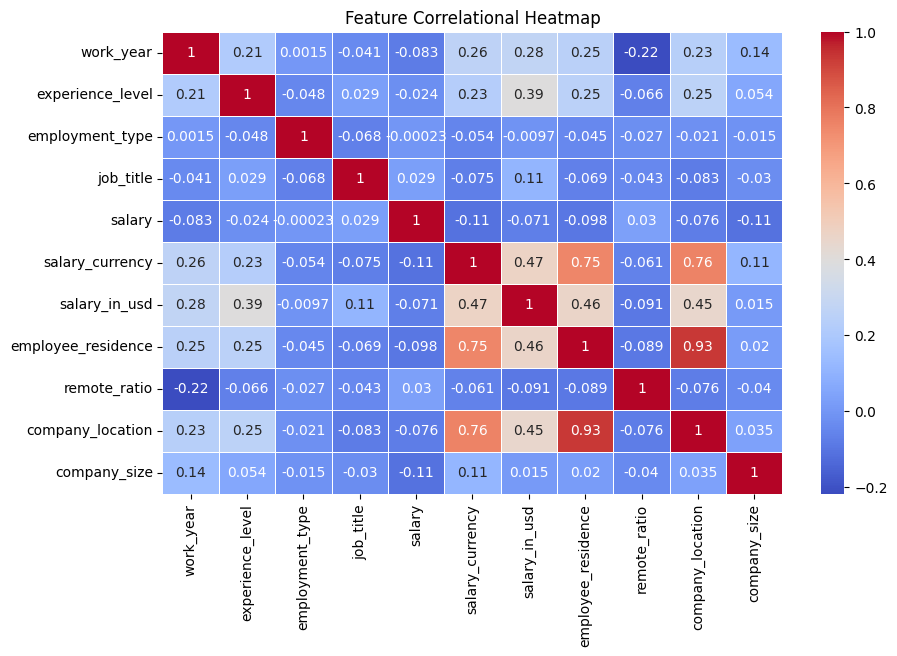

In [294]:
# Correlational heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlational Heatmap')
plt.show()

In [295]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3493,2022.0,3,2,31,66000,19,66000,74,100,70,1
2254,2023.0,0,2,14,160000,19,160000,74,0,70,1
1534,2023.0,3,2,4,87000,19,87000,74,0,70,1
2318,2023.0,3,2,38,168400,19,168400,74,0,70,1
2127,2023.0,2,2,25,125000,19,125000,74,0,70,1


In [296]:
# Separate features and target
X = df.drop(columns=['salary_in_usd', 'salary'])  # Drop 'salary' and 'salary_in_usd'
y = df['salary_in_usd']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2244, 9), (561, 9), (2244,), (561,))

In [299]:
X_train.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
1396,2023.0,3,2,25,19,74,0,70,1
2045,2023.0,3,2,47,19,74,100,70,1
3175,2022.0,3,2,4,19,74,100,70,1
541,2022.0,3,2,25,19,74,100,70,1
1195,2023.0,3,2,70,19,74,0,70,1


In [300]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building

In [301]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 50)

In [302]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [303]:
import joblib

# Train and evaluate models
best_model = None
best_r2 = -float('inf')  # Initialize with the lowest possible value

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Make predictions
    r2 = r2_score(y_test, y_pred)  # Calculate R² score

    # Check if this model is the best
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

    # Print evaluation metrics
    evaluate_model(y_test, y_pred, name)

Model: Linear Regression
MAE: 38680.06
MSE: 2433838759.15
RMSE: 49333.95
R² Score: 0.37
--------------------------------------------------
Model: Decision Tree
MAE: 34617.87
MSE: 2210267299.67
RMSE: 47013.48
R² Score: 0.43
--------------------------------------------------
Model: Random Forest
MAE: 32582.48
MSE: 1942984966.94
RMSE: 44079.30
R² Score: 0.50
--------------------------------------------------
Model: XGBoost
MAE: 32065.53
MSE: 1847610368.00
RMSE: 42983.84
R² Score: 0.52
--------------------------------------------------


In [304]:
# Save the best model
joblib.dump(best_model, 'best_salary_predictor.pkl')
print(f"\nBest Model: {best_model_name} with R² Score: {best_r2:.2f}")
print("Model saved as 'best_salary_predictor.pkl'")


Best Model: XGBoost with R² Score: 0.52
Model saved as 'best_salary_predictor.pkl'


## Load the Model and Predict Salary from User Input

In [305]:
loaded_model = joblib.load('best_salary_predictor.pkl')

In [306]:
def predict_user_salary(user_input):
    # Convert the user input into a DataFrame
    user_df = pd.DataFrame([user_input])

    # Ensure the DataFrame has the same columns as the training data
    expected_columns = ['work_year', 'experience_level', 'employment_type', 'job_title',
                        'salary_currency', 'employee_residence', 'remote_ratio',
                        'company_location', 'company_size']  # Exclude 'salary'
    user_df = user_df.reindex(columns=expected_columns)

    # Preprocess the input (same as training data preprocessing)
    label_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                  'employee_residence', 'company_location', 'company_size']

    for col in label_cols:
        le = LabelEncoder()
        user_df[col] = le.fit_transform(user_df[col])

    # Standardize the input
    user_scaled = scaler.transform(user_df)

    # Predict salary
    predicted_salary = loaded_model.predict(user_scaled)
    return predicted_salary[0]

In [307]:
# Example user input
user_input = {
    'work_year': 2023,
    'experience_level': 'SE',  # Senior-level
    'employment_type': 'FT',   # Full-time
    'job_title': 'Data Scientist',
    'salary_currency': 'USD',
    'employee_residence': 'US',
    'remote_ratio': 100,       # Fully remote
    'company_location': 'US',
    'company_size': 'L'        # Large company
}


In [308]:
# Predict salary
predicted_salary = predict_user_salary(user_input)
print(f"Predicted Salary: ${predicted_salary:.2f}")

Predicted Salary: $172578.88
